In [1]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
# Download the data
data = et.data.get_data('colorado-flood')

In [3]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Define relative path to file with daily precip total
file_path = os.path.join("data", "colorado-flood",
                         "precipitation",
                         "805325-precip-dailysum-2003-2013.csv")

In [4]:
# Import data using datetime and no data value
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                       parse_dates=['DATE'],
                                       index_col= ['DATE'],
                                       na_values=['999.99'])

# View first few rows
boulder_precip_2003_2013.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
2003-01-05,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,5
2003-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
2003-02-02,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,33
2003-02-03,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,34


In [5]:
# View dataframe info
boulder_precip_2003_2013.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 792 entries, 2003-01-01 to 2013-12-31
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DAILY_PRECIP  788 non-null    float64
 1   STATION       792 non-null    object 
 2   STATION_NAME  792 non-null    object 
 3   ELEVATION     792 non-null    float64
 4   LATITUDE      792 non-null    float64
 5   LONGITUDE     792 non-null    float64
 6   YEAR          792 non-null    int64  
 7   JULIAN        792 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 55.7+ KB


In [6]:
# View summary statistics
boulder_precip_2003_2013.describe()

,DAILY_PRECIP,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
count,788.000000,792.0,792.000000,792.000000,792.000000,792.000000
mean,0.247843,1650.5,40.033850,-105.281106,2007.967172,175.541667
std,0.462558,0.0,0.000045,0.000005,3.149287,98.536373
min,0.000000,1650.5,40.033800,-105.281110,2003.000000,1.000000
25%,0.100000,1650.5,40.033800,-105.281110,2005.000000,96.000000
50%,0.100000,1650.5,40.033890,-105.281110,2008.000000,167.000000
75%,0.300000,1650.5,40.033890,-105.281100,2011.000000,255.250000
max,9.800000,1650.5,40.033890,-105.281100,2013.000000,365.000000


In [7]:
# View index values of dataframe
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01', '2003-01-05', '2003-02-01', '2003-02-02',
               '2003-02-03', '2003-02-05', '2003-02-06', '2003-02-07',
               '2003-02-10', '2003-02-18',
               ...
               '2013-11-01', '2013-11-09', '2013-11-21', '2013-11-27',
               '2013-12-01', '2013-12-04', '2013-12-22', '2013-12-23',
               '2013-12-29', '2013-12-31'],
              dtype='datetime64[ns]', name='DATE', length=792, freq=None)

In [8]:
# Select 2013 data - view first few records
boulder_precip_2003_2013['2013'].head()

/var/folders/nb/qps0bcwd16qcyqb4ghpw5sk40000gn/T/ipykernel_73473/2571054306.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  boulder_precip_2003_2013['2013'].head()


,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,1
2013-01-28,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,28
2013-01-29,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,29
2013-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,32
2013-02-14,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,45


In [9]:
# Select 2013 data - view last few records
boulder_precip_2003_2013['2013'].tail()

/var/folders/nb/qps0bcwd16qcyqb4ghpw5sk40000gn/T/ipykernel_73473/3042881516.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  boulder_precip_2003_2013['2013'].tail()


,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-12-04,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,338
2013-12-22,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,356
2013-12-23,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,357
2013-12-29,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,363
2013-12-31,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,365


In [10]:
# Select all December data - view first few rows
boulder_precip_2003_2013[boulder_precip_2003_2013.index.month == 12].head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-12-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,335
2004-12-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2004,336
2004-12-22,0.2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2004,357
2004-12-24,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2004,359
2005-12-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,335


In [13]:
# Subset data to May-Aug 2005
precip_may_aug_2005 = boulder_precip_2003_2013['2005-05-01':'2005-08-31']

precip_may_aug_2005.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2005-05-01,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,121
2005-05-11,1.2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,131
2005-05-30,0.5,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,150
2005-05-31,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,151
2005-06-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,152


In [14]:
# Check min value of index 
print(precip_may_aug_2005.index.min())

# Check max value of index 
print(precip_may_aug_2005.index.max())

2005-05-01 00:00:00
2005-08-23 00:00:00


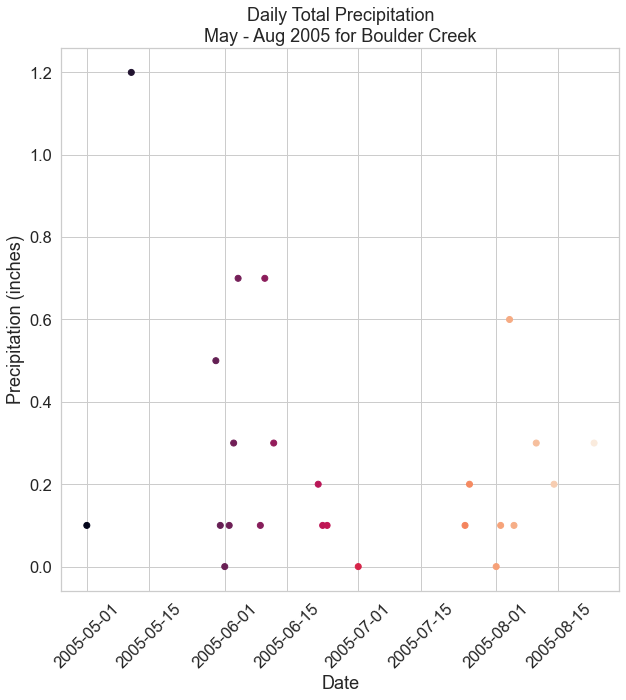

In [23]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(precip_may_aug_2005.index.values,
       precip_may_aug_2005['DAILY_PRECIP'],
       c=precip_may_aug_2005['JULIAN'])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nMay - Aug 2005 for Boulder Creek")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()